In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.utils import resample
import matplotlib.pyplot as plt

loans_income = pd.read_csv("loans_income.csv")

In [9]:
sample_data = pd.DataFrame({
    'income': loans_income.sample(1000),
    'type': 'Data',
})
sample_mean_05 = pd.DataFrame({
    'income': [loans_income.sample(5).mean() for _ in range(1000)],
    'type': 'Mean of 5',
})
sample_mean_20 = pd.DataFrame({
    'income': [loans_income.sample(20).mean() for _ in range(1000)],
    'type': 'Mean of 20',
})
results = pd.concat([sample_data, sample_mean_05, sample_mean_20])

g=sns.FacetGrid(results, col='type', col_wrap=1, height=2, aspect=2)
g.map(plt.hist, 'income', range=[0, 200000], bins=40)
g.set_axis_labels('Income', 'Count')
g.set_titles('{col_name}')

ValueError: If using all scalar values, you must pass an index

In [15]:
results = []
for nrepeat in range(1000):
    sample = resample(loans_income)
    results.append(sample.median())
results = pd.Series(results)
print('Bootstrap Statistics:')
print(f'original: {loans_income.median()}')
print(f'bias: {results.mean() - loans_income.median()}')
print(f'std. error: {results.std()}')

Bootstrap Statistics:
original: x    62000.0
dtype: float64
bias: x   -69.354
dtype: float64
std. error: 213.3479951887316


((array([-2.46203784, -2.12570747, -1.93122778, -1.79044653, -1.67819304,
         -1.58381122, -1.50174123, -1.42869743, -1.36256869, -1.30191411,
         -1.24570419, -1.19317644, -1.14374949, -1.09696931, -1.05247413,
         -1.00997067, -0.96921765, -0.93001393, -0.89218993, -0.85560121,
         -0.82012357, -0.78564937, -0.75208458, -0.71934648, -0.68736185,
         -0.65606548, -0.62539893, -0.59530962, -0.56574992, -0.53667655,
         -0.50804994, -0.47983378, -0.45199463, -0.42450149, -0.39732558,
         -0.37044003, -0.34381966, -0.31744076, -0.29128096, -0.26531902,
         -0.23953472, -0.21390872, -0.18842244, -0.16305799, -0.13779803,
         -0.1126257 , -0.08752455, -0.06247843, -0.03747145, -0.01248789,
          0.01248789,  0.03747145,  0.06247843,  0.08752455,  0.1126257 ,
          0.13779803,  0.16305799,  0.18842244,  0.21390872,  0.23953472,
          0.26531902,  0.29128096,  0.31744076,  0.34381966,  0.37044003,
          0.39732558,  0.42450149,  0.

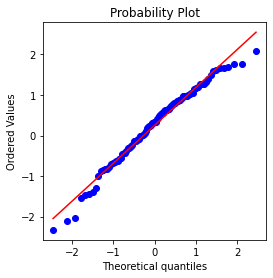

In [18]:
fig, ax = plt.subplots(figsize=(4,4))
norm_sample = stats.norm.rvs(size=100)
stats.probplot(norm_sample, plot=ax)

In [19]:
sp500_px = pd.read_csv("sp500_data.csv")

((array([-3.33278964, -3.07756454, -2.93575124, ...,  2.93575124,
          3.07756454,  3.33278964]),
  array([-6.60529819, -6.09667121, -5.40220961, ...,  5.12547859,
          5.87072271,  6.03787   ])),
 (1.4823778663727099, 0.0015561067366313861, 0.9941828221936326))

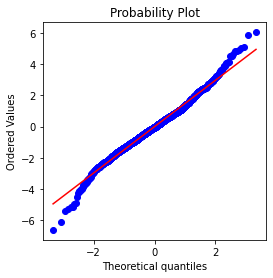

In [20]:
nflx = sp500_px.NFLX
nflx = np.diff(np.log(nflx[nflx>0]))
fig, ax = plt.subplots(figsize=(4,4))
stats.probplot(nflx, plot=ax)

In [21]:
stats.binom.pmf(2, n=5, p=0.1)
stats.binom.cdf(2, n=5, p=0.1)

0.99144

In [3]:
stats.poisson.rvs(2, size=100)

array([3, 3, 0, 4, 4, 3, 0, 3, 1, 3, 3, 2, 2, 1, 2, 1, 5, 2, 1, 2, 3, 2,
       4, 3, 2, 1, 0, 0, 1, 1, 3, 1, 2, 3, 1, 2, 2, 2, 1, 0, 3, 2, 3, 4,
       0, 5, 2, 3, 3, 5, 2, 1, 0, 4, 2, 1, 5, 3, 1, 1, 1, 0, 4, 1, 1, 3,
       1, 1, 1, 2, 3, 5, 1, 3, 2, 1, 2, 2, 2, 0, 2, 2, 0, 1, 1, 0, 1, 2,
       2, 2, 1, 1, 3, 4, 2, 2, 2, 2, 0, 2])

In [4]:
stats.expon.rvs(scale=1/0.2, size=100)
stats.expon.rvs(scale=5, size=100)

array([ 1.75584434, 11.52083716,  2.23553612,  1.02208663,  1.95862063,
        2.10859824,  4.146821  ,  0.35324221,  1.16207471,  0.25954886,
        2.91611491,  2.07949542,  1.87702681,  2.5965006 , 14.3148159 ,
        0.67788935,  0.38273026,  7.22249249, 16.21177669,  0.81162902,
        3.75952355,  0.36829011, 17.29113718,  6.59434686,  1.5911424 ,
        4.46242324,  0.27985255, 10.58145544,  1.15370399,  6.62120159,
        0.56326484,  3.84665446,  7.23869985,  2.56810873,  0.13031931,
        3.20966885,  1.03558863,  2.09816685,  3.2236499 ,  0.52287669,
       11.94439821,  6.07280032,  2.05026807,  2.66022713,  3.54286725,
       11.01976676,  1.81925897,  0.43794123,  7.28381697,  0.02774992,
        1.12729362, 15.39737259,  5.72015321,  8.95792479,  9.85236464,
       15.61225888,  3.79976983,  1.38785251,  1.42020496,  0.10527447,
        9.53539744,  8.85310834,  0.8024535 ,  4.12127176,  6.59204104,
        3.92293019,  1.85513405,  2.30274275,  3.35732521, 18.85

In [5]:
stats.weibull_min.rvs(1.5, scale=5000, size=100)

array([9.43721264e+03, 4.93869843e+03, 1.28312728e+03, 1.07344406e+03,
       4.41839359e+03, 6.96020055e+03, 8.18368027e+02, 3.12964421e+03,
       4.04642219e+03, 2.36900034e+03, 2.52116889e+03, 1.60681374e+03,
       6.46392984e+03, 2.16277086e+03, 5.64628842e+03, 7.98649958e+03,
       2.13892415e+03, 1.92244706e+03, 5.28086162e+03, 1.00437392e+03,
       1.68452600e+04, 6.12454341e+03, 3.60518192e+03, 2.80263786e+03,
       1.68496438e+03, 1.89011694e+03, 8.33561041e+03, 5.25400009e+03,
       6.30751758e+03, 2.40980938e+03, 5.51848598e+03, 4.85846846e+03,
       9.73294311e+03, 1.71862037e+03, 4.13854963e+03, 1.82403461e+03,
       2.09177808e+03, 6.30549994e+03, 5.37269949e+03, 2.78778346e+03,
       1.77900967e+03, 1.82381316e+03, 1.71372875e+03, 1.25108691e+04,
       2.66572865e+03, 3.20386198e+03, 3.90689174e+03, 8.14337642e+03,
       3.69720683e+03, 2.28631651e+03, 7.42490525e+03, 6.50984152e+03,
       1.37249226e+03, 3.93156270e+03, 1.25201837e+04, 6.50101315e+03,
      